In [1]:
from prepare_data import prepare_data

In [2]:
data_dir = "D:/fer/zavrsni_data/data_cpac"
output_dir = "D:/fer/zavrsni_data/data_cpac"


X, y = prepare_data(data_dir=data_dir, output_dir=output_dir)

pipeline cpac
Loading dataset...
Downloaded all files
Feature file found.
(2016,)
871
[0.651508   0.36743073 0.31826976 ... 0.56326686 0.53300758 0.54327946]
[[ 0.651508    0.36743073  0.31826976 ...  0.56326686  0.53300758
   0.54327946]
 [ 0.53258726  0.3377011   0.49584742 ...  0.40197062  0.18363887
   0.457722  ]
 [ 0.4190768   0.2041985   0.33218378 ...  0.78088126  0.34119973
   0.56367589]
 ...
 [ 0.60767136  0.13870343  0.21027113 ...  0.32434371  0.05419067
   0.42023549]
 [ 0.11514753  0.03477415  0.03612913 ...  0.39019805 -0.09443257
  -0.06281977]
 [ 0.4149792   0.28418048  0.35910961 ...  0.66591602  0.25099767
   0.36904969]]


In [20]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import (
    Dense,
    Input,
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dropout,
    Conv1D,
    BatchNormalization,
    ReLU,
    GlobalAveragePooling1D,
)
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras.utils import plot_model
import tensorflow as tf
from tensorflow import keras
import numpy as np

ImportError: cannot import name 'MaxPooling' from 'tensorflow.keras.layers' (c:\Users\Admin\anaconda3\envs\zavrsni\lib\site-packages\keras\_tf_keras\keras\layers\__init__.py)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(696, 2016) (175, 2016) (696,) (175,)


In [42]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [54]:
X_train.shape, X_test.shape

((696, 2016, 1), (175, 2016, 1))

In [43]:

input = Input(shape=X_train.shape)
conv1 = Conv2D(32, (3, 3), activation="relu")(input)
dropout1 = Dropout(0.2)(conv1)
max_pooling1 = MaxPooling2D((2, 2))(dropout1)
conv2 = Conv2D(32, (3, 3), activation="relu")(max_pooling1)
dropout2 = Dropout(0.2)(conv2)
max_pooling2 = MaxPooling2D((2, 2))(dropout2)
dense1 = Dense(150, activation="sigmoid")(max_pooling2)
dropout3 = Dropout(0.2)(dense1)
output = Dense(1, activation="sigmoid")(dropout3)

model = Model(inputs=input, outputs=output)
model.summary()

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 696, 2016, 1)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 694, 2014, 32)  │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 694, 2014, 32)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 347, 1007, 32)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 345, 1005, 32)  │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 345, 1005, 32)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 172, 502, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 172, 502, 150)  │         4,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 172, 502, 150)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 172, 502, 1)    │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,669 (57.30 KB)

 Trainable params: 14,669 (57.30 KB)

 Non-trainable params: 0 (0.00 B)

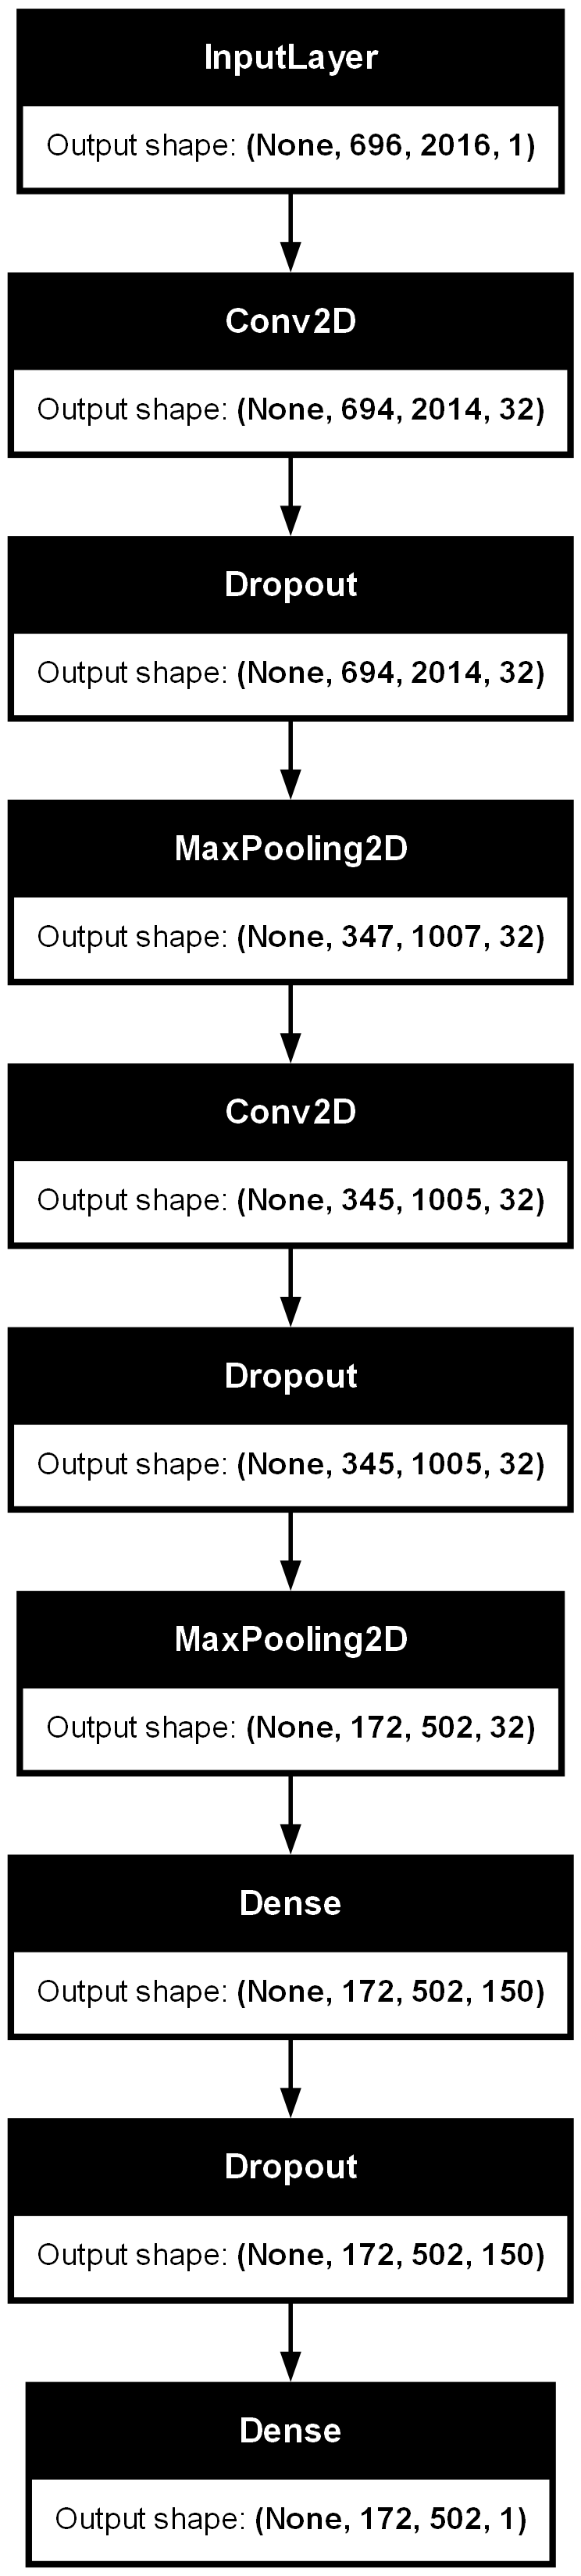

In [45]:
plot_model(model, to_file="model.png", show_shapes=True)

In [46]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [47]:
callbacks = [
    ModelCheckpoint("best_model.keras", save_best_only=True, monitor="val_loss"),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001),
    EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

In [48]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=callbacks, verbose=1)

Epoch 1/100


ValueError: Input 0 of layer "functional_25" is incompatible with the layer: expected shape=(None, 696, 2016, 1), found shape=(None, 2016)